In [4]:
import pandas as pd
c_names = ['post 1','post 2','post 3','post 4']
words = ['ice','snow','ghost','tahoe','puck']

data = pd.DataFrame([[1,5,7,6],
              [5,8,6,7],
              [8,7,6,3],
              [2,6,8,4],
              [5,7,6,5]      ],index=words,columns=c_names)

data.index.name='words'
data

,post 1,post 2,post 3,post 4
words,,,,
ice,1,5,7,6
snow,5,8,6,7
ghost,8,7,6,3
tahoe,2,6,8,4
puck,5,7,6,5


In [14]:
import numpy as np

U, sigma, V = np.linalg.svd(data)
print(np.round(V,decimals=2))

[[-0.38 -0.58 -0.57 -0.44]
 [-0.84 -0.11  0.37  0.39]
 [ 0.02  0.11 -0.68  0.72]
 [ 0.39 -0.8   0.27  0.37]]


In [15]:
U

array([[-0.38719655,  0.60400693,  0.05040548,  0.69299189,  0.04975932],
       [-0.50984079, -0.01844793,  0.67251474, -0.28509849, -0.45405377],
       [-0.4632444 , -0.69042621, -0.34639905,  0.38287526, -0.20525718],
       [-0.41288125,  0.37528582, -0.63780806, -0.49821968, -0.18348748],
       [-0.45285197, -0.13155799,  0.13561636, -0.20896119,  0.8459084 ]])

In [16]:
sigma

array([25.58342131,  5.87513065,  2.90317096,  0.73688006])

In [18]:
A_approx = np.matrix(U[:, :2])*np.diag(sigma[:2])*np.matrix(V[:2,:])
pd.DataFrame(A_approx,index=words,columns=c_names)

,post 1,post 2,post 3,post 4
ice,0.797317,5.390680,6.962497,5.704938
snow,5.052706,7.610626,7.387536,5.667163
ghost,7.904580,7.339283,5.238556,3.622035
tahoe,2.172338,5.917533,6.836316,5.474038
puck,5.054442,6.832455,6.309807,4.772608


In [19]:
print(data-A_approx)

         post 1    post 2    post 3    post 4
words                                        
ice    0.202683 -0.390680  0.037503  0.295062
snow  -0.052706  0.389374 -1.387536  1.332837
ghost  0.095420 -0.339283  0.761444 -0.622035
tahoe -0.172338  0.082467  1.163684 -1.474038
puck  -0.054442  0.167545 -0.309807  0.227392


TypeError: len() takes exactly one argument (3 given)

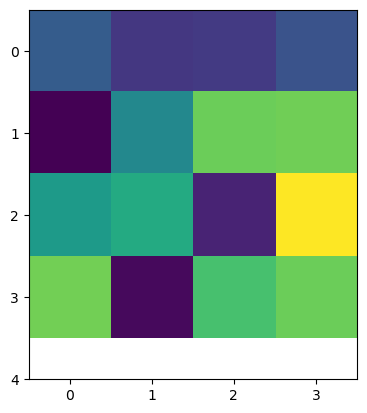

In [22]:
import matplotlib.pyplot as plt

plt.imshow(V,interpolation='None')
plt.xticks(range(len(c_names)))
plt.yticks(range(len(words)))
plt.ylim([len(words),-1.5,-.5])
ax=plt.gca()

ax.set_xticklabels(c_names)
ax.set_yticklabels(range(1,len(word)+1))

plt.colorbar